# Подготовка
Подготовка заключалась в том, что я выставил все частоту процессора на максимум, подключил к ноутбук к питанию, закрыл все приложения (так же закрыл все ненужные фоновые процессы).
Измерения проихводились на ноутбуке **HONOR MagicBook 14** модель: **NBLK-WFX9X**
* ОС: **Windows 10 домашняя**
* Процессор: **AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx, 2100 Mгц, 4 ядра, 8 логических процессоров**
* Объём оперативной памяти: **8 ГБ**
## Используемые формулы
В процессе обработки результатов использовались следующие формулы:
* Среднее арифметическое: $$ \overline{x} = \frac{\sum x_i}{n} $$
* Стандартное отклонение: $$\sigma_{с.о.} = \sqrt{\frac{\sum{(\overline{x} - x_i)^2}}{n-1}}$$
* Среднее отклонение среднего: $$\sigma_{с.о.о} = \frac{\sigma_{с.о.}}{\sqrt{n}}$$

Эти формулы не используются напрямую, т.к. были взяты соответствующие библиотеки.
# Ход обработки результатов
1. Сначала подключаем нужные библиотеки

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

2. Обрабатываем файл с результатами, выводим гистограмму

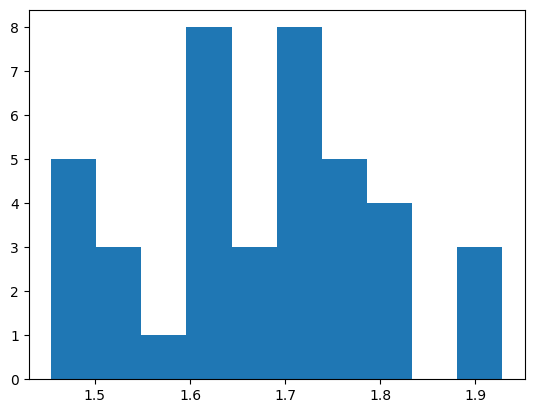

In [2]:
result_file = 'result_1.txt'
file = open(result_file, 'r', encoding='UTF8')
measuring_result = list(map(lambda x: float(x) / 1000 if x != '' else None, file.read().split('\n')))
_, _, hist = plt.hist(measuring_result)

                        Гистограмма по полученным данным

3. Проходим тесты на нормальность. Проверяем, что хотя бы один выполнился, для этого p-value должен быть больше 0.05

In [3]:
_, pvn = stats.normaltest(measuring_result)
_, pvs = stats.shapiro(measuring_result)
if pvn > 0.05 or pvs > 0.05: 
    print('Какие-то тесты на нормальность прошлись')
else:
    print('Всё плохо')

Какие-то тесты на нормальность прошлись


4. Считаем среднее, стандартное отклонение и  95% доверительный интервал. Проверяем, что стандартное отклонение не получилось слишком большим ( >15% от среднего) 

In [4]:
mean = np.mean(measuring_result)
std = np.std(measuring_result, ddof=1)
conf = stats.t.ppf(0.975, df=len(measuring_result) - 1) * stats.sem(measuring_result)
print(f'стандартное отклонение ~ {round(std/mean * 100)}% от среднего')
print(f'Промежуточные результаты: \nсреднее: {mean}, \nпредсказывающий интервал: {2* std}, \nдоверительный интервал: {conf}')

стандартное отклонение ~ 7% от среднего
Промежуточные результаты: 
среднее: 1.6744999999999997, 
предсказывающий интервал: 0.2491594073207156, 
доверительный интервал: 0.0398425219825564


5. Округляем среднее, удволенное стандартное отклонение (который соответствует 95% предсказывающему интервалу), и доверительный интервал по математическим стандартам

In [6]:
mean = round(mean, 2)
pred = round(2 * std, 2)
conf = round(conf, 3)

print(f"Результат: \n{mean} +- {pred}\n{mean} +- {conf}")

Результат: 
1.67 +- 0.25
1.67 +- 0.04


6. По итогам получилось, что среднее $\overline{x} = 1.67$, предсказывающий интервал $a_{п.и.} = 0.25$, а доверительный интервал $b_{д.и.} = 0.04$